# Rise of Kingdoms: Gold Chest Items

## Import packages and set options

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats

colors = {'expected': 'grey', 'single': 'b', '100': 'r', '201': 'g'}

def set_label_color():
    legendary = '#d17f00'
    epic = '#833093'
    elite = '#046891'
    
    ax.get_xticklabels()[0].set_color(legendary)
    ax.get_xticklabels()[1].set_color(epic)
    ax.get_xticklabels()[2].set_color(elite)
    ax.get_xticklabels()[3].set_color(legendary)
    ax.get_xticklabels()[4].set_color(epic)
    ax.get_xticklabels()[5].set_color(elite)
    ax.get_xticklabels()[6].set_color(legendary)
    ax.get_xticklabels()[7].set_color(epic)

## Load Data

In [2]:
df_expect = pd.read_excel('data.xlsx', sheet_name='gold_probability')
df_single = pd.read_excel('data.xlsx', sheet_name='gold_single')
df_100 = pd.read_excel('data.xlsx', sheet_name='gold_100')
df_201 = pd.read_excel('data.xlsx', sheet_name='gold_201')

## Descriptives

In [3]:
n_single = df_single['Count'].sum()
n_100 = df_100['Count'].sum()
n_201 = df_201['Count'].sum()

print('Total number of items (singles): {}'.format(n_single))
print('Total number of items (batch): {}'.format(n_201))

Total number of items (singles): 1297
Total number of items (batch): 1304


## Distributions

### Coin example

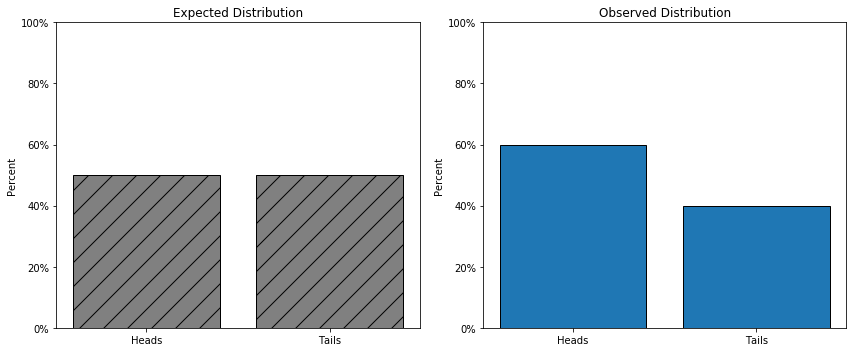

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].bar(['Heads', 'Tails'], [50, 50], edgecolor ='k', color=colors['expected'], hatch='/')
ax[1].bar(['Heads', 'Tails'], [60, 40], edgecolor ='k')

ax[0].set_title('Expected Distribution')
ax[1].set_title('Observed Distribution')

ax[0].set_ylabel('Percent')
ax[0].set_ylim(0, 100)
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

ax[1].set_ylabel('Percent')
ax[1].set_ylim(0, 100)
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

plt.tight_layout()
plt.savefig('plots/example.png')
plt.show()

### Expected Distribution

From the reward list page in the tavern we can see what the expected distribution of items (from gold chests) should be. The following percentages sum to 100

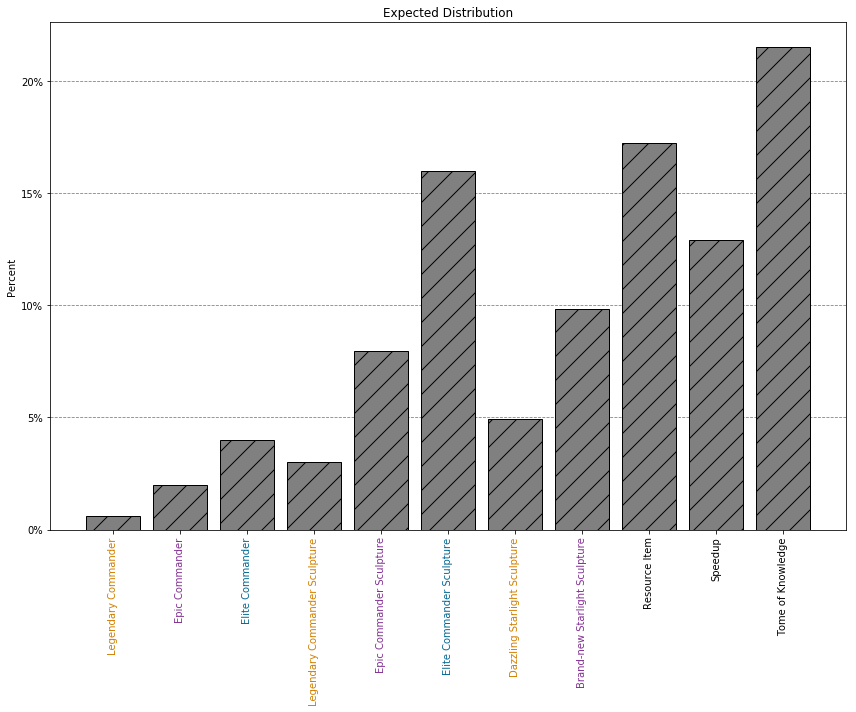

In [5]:
assert df_expect['Percent'].sum() == 100

f, ax = plt.subplots(1, 1, figsize=(12,10))
ax.bar(df_expect['Reward'], df_expect['Percent'], color=colors['expected'], edgecolor ='k', hatch='/')

ax.set_title('Expected Distribution')
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Percent')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

set_label_color()

plt.tight_layout()
plt.savefig('plots/expected.png')
plt.show()

### Single distribution

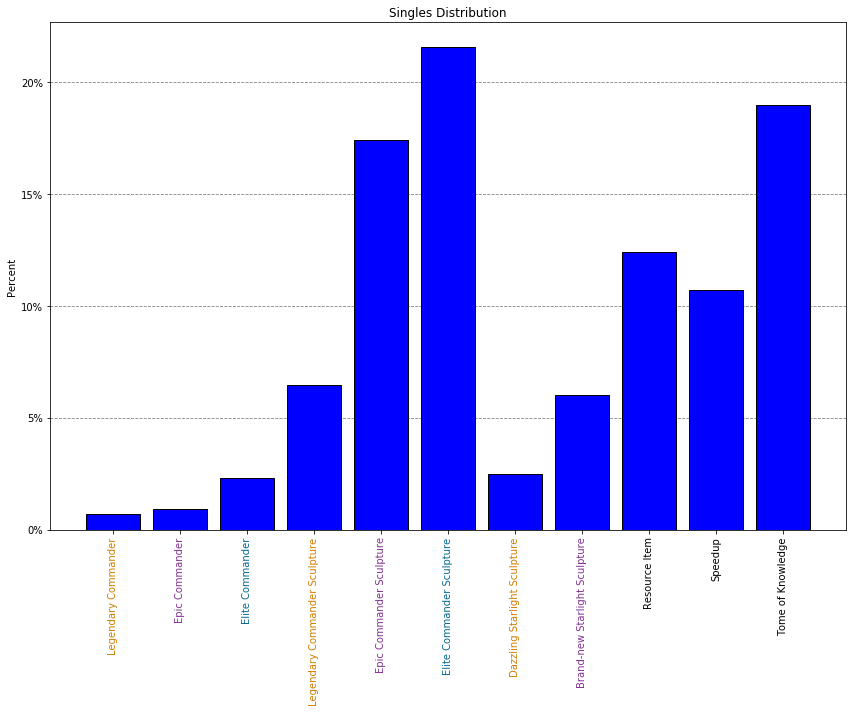

In [6]:
df_single_group = df_single.groupby('Reward')['Count'].sum()
df_single_group = df_single_group.reindex(df_expect['Reward'])
df_expect['Single Expect'] = (n_single * (df_expect['Percent']/100)).astype(int)

f, ax = plt.subplots(1, 1, figsize=(12,10))
ax.bar(df_single_group.index, (df_single_group/n_single)*100, color=colors['single'], edgecolor ='k')

ax.set_title('Singles Distribution')
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Percent')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

set_label_color()

plt.tight_layout()
plt.savefig('plots/single.png')
plt.show()

### Batch (201) distribution

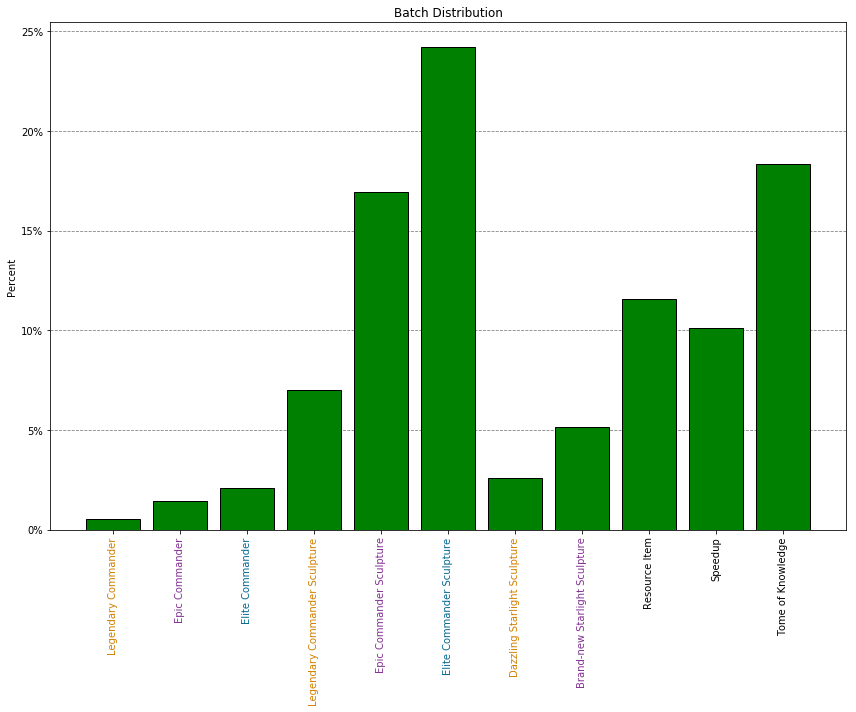

In [7]:
df_201_group = df_201.groupby('Reward')['Count'].sum()
df_201_group = df_201_group.reindex(df_expect['Reward'])
df_expect['201 Expect'] = (n_201 * (df_expect['Percent']/100)).astype(int)

f, ax = plt.subplots(1, 1, figsize=(12,10))
ax.bar(df_201_group.index, (df_201_group/n_201)*100, color=colors['201'], edgecolor ='k')

ax.set_title('Batch Distribution')
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Percent')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

set_label_color()

plt.tight_layout()
plt.savefig('plots/batch_201.png')
plt.show()

### Combined

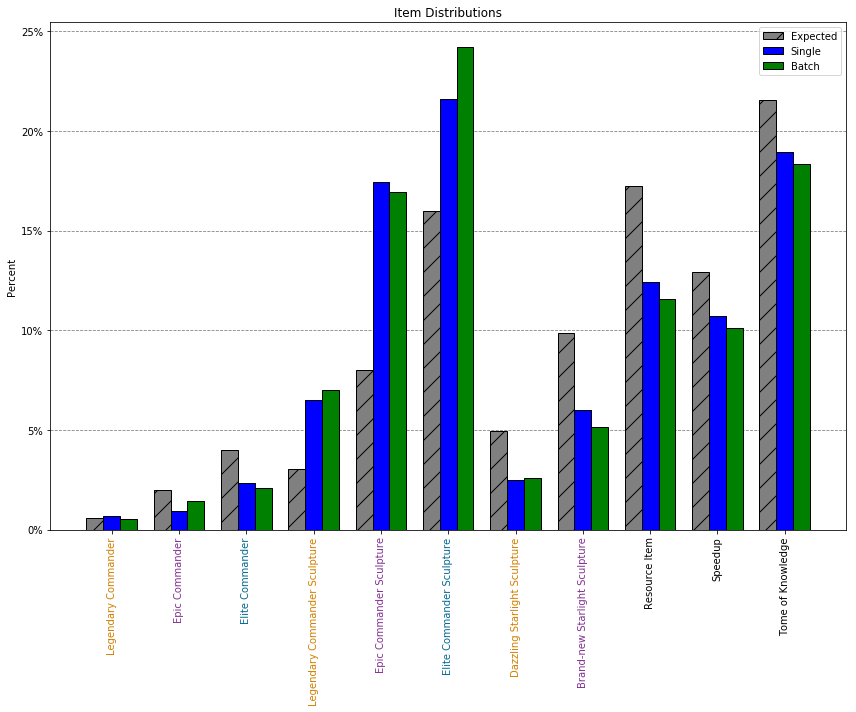

In [8]:
ind = np.arange(len(df_expect))
width = 0.25

f, ax = plt.subplots(1, 1, figsize=(12,10))
p1 = ax.bar(ind-width, df_expect['Percent'], width, color=colors['expected'], edgecolor ='k', hatch='/')
p2 = ax.bar(ind, (df_single_group/n_single)*100, width, color=colors['single'], edgecolor ='k')
p3 = ax.bar(ind+width, (df_201_group/n_201)*100, width, color=colors['201'], edgecolor ='k')

ax.set_title('Item Distributions')
ax.set_xticks(ind)
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Percent')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend((p1[0], p2[0], p3[0]), ('Expected', 'Single', 'Batch'))

set_label_color()

plt.tight_layout()
plt.savefig('plots/combined.png')
plt.show()

## Comparisons

### Single Distribution vs. Expected

Does the count distribution of single items match the expected counts for this sample size? The percentage-based expectations have been converted to expected counts for comparison

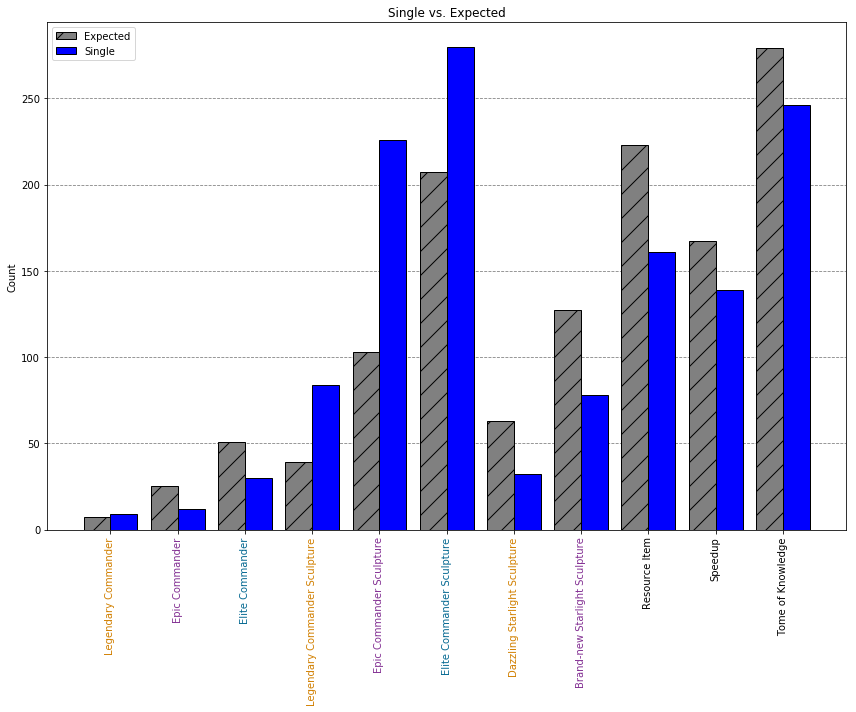

Reward
Legendary Commander                9
Epic Commander                    12
Elite Commander                   30
Legendary Commander Sculpture     84
Epic Commander Sculpture         226
Elite Commander Sculpture        280
Dazzling Starlight Sculpture      32
Brand-new Starlight Sculpture     78
Resource Item                    161
Speedup                          139
Tome of Knowledge                246
Name: Count, dtype: int64


In [9]:
ind = np.arange(len(df_expect))
width = 0.4

f, ax = plt.subplots(1, 1, figsize=(12,10))
p1 = ax.bar(ind, df_expect['Single Expect'], width, color=colors['expected'], edgecolor ='k', hatch='/')
p2 = ax.bar(ind+width, df_single_group, width, color=colors['single'], edgecolor ='k')

ax.set_title('Single vs. Expected')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Count')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend((p1[0], p2[0]), ('Expected', 'Single'))

set_label_color()

plt.tight_layout()
plt.savefig('plots/compare_single.png')
plt.show()

print(df_single_group)

Using chi square goodness of fit we see a difference between what we obtained and what we should expect

In [10]:
scipy.stats.chisquare(df_single_group, df_expect['Single Expect'])

Power_divergenceResult(statistic=300.5240056276445, pvalue=1.2046596556464749e-58)

#### Single instances vs. Expected

The percentages in the tavern may refer to instances of drops rather than the total number of drops. A single chest has 4 drop instances. For example, Legendary sculptures has a 3% drop chance. This could mean that 3% of all instances of drops (regardless how of many are dropped) are sculptures, rather than 3% of the total number of items are legendary heads (as with the data above)

In the singles data we have 201 individual chests, and 804 separate drop instances

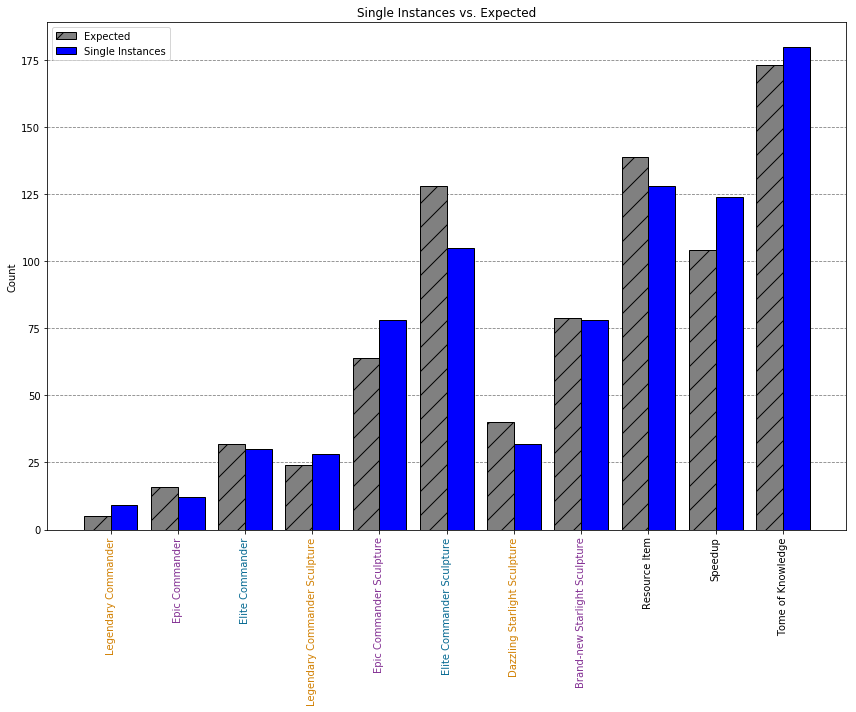

Reward
Legendary Commander                9
Epic Commander                    12
Elite Commander                   30
Legendary Commander Sculpture     28
Epic Commander Sculpture          78
Elite Commander Sculpture        105
Dazzling Starlight Sculpture      32
Brand-new Starlight Sculpture     78
Resource Item                    128
Speedup                          124
Tome of Knowledge                180
Name: Count, dtype: int64


In [11]:
n_instances = len(df_single)
df_single_instance = df_single.groupby('Reward')['Count'].count().reindex(df_expect['Reward'])
df_expect['Single Instance Expect'] = round(n_instances*(df_expect['Percent']/100))

assert n_instances == df_single_instance.sum()

ind = np.arange(len(df_expect))
width = 0.4

f, ax = plt.subplots(1, 1, figsize=(12,10))
p1 = ax.bar(ind, df_expect['Single Instance Expect'], width, color=colors['expected'], edgecolor ='k', hatch='/')
p2 = ax.bar(ind+width, df_single_instance, width, color=colors['single'], edgecolor ='k')

ax.set_title('Single Instances vs. Expected')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Count')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend((p1[0], p2[0]), ('Expected', 'Single Instances'))

set_label_color()

plt.tight_layout()
plt.savefig('plots/compare_single_instances.png')
plt.show()

print(df_single_instance)

In [12]:
scipy.stats.chisquare(df_single_instance, df_expect['Single Instance Expect'])

Power_divergenceResult(statistic=18.799531832010569, pvalue=0.042884063661720311)

### Batch Distribution vs. Expected

Does the count distribution of a batch (201) match the expected counts for this sample size? The percentage-based expectations have been converted to expected counts for comparison

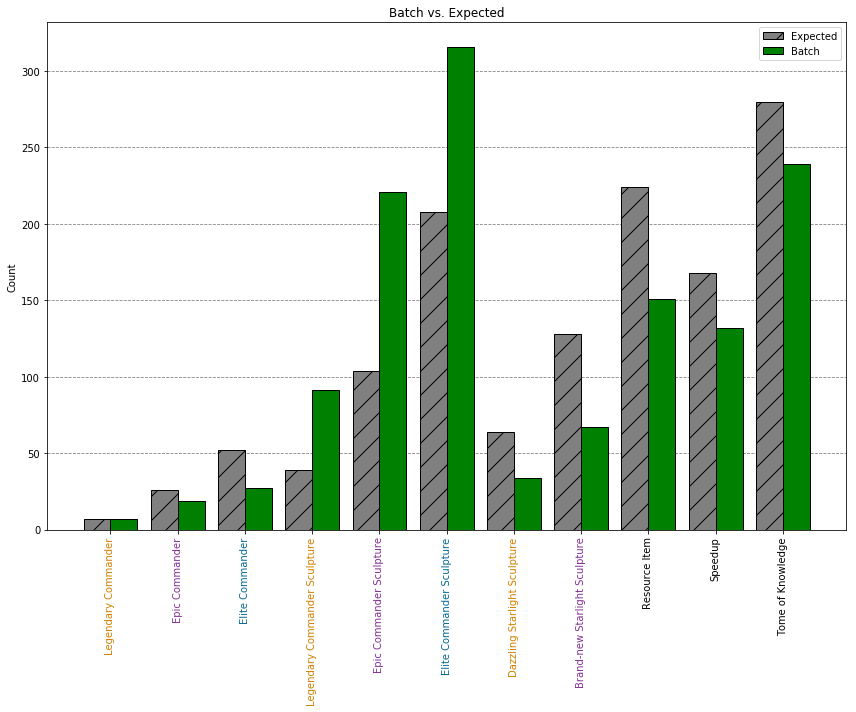

Reward
Legendary Commander                7
Epic Commander                    19
Elite Commander                   27
Legendary Commander Sculpture     91
Epic Commander Sculpture         221
Elite Commander Sculpture        316
Dazzling Starlight Sculpture      34
Brand-new Starlight Sculpture     67
Resource Item                    151
Speedup                          132
Tome of Knowledge                239
Name: Count, dtype: int64


In [13]:
ind = np.arange(len(df_expect))
width = 0.4

f, ax = plt.subplots(1, 1, figsize=(12,10))
p1 = ax.bar(ind, df_expect['201 Expect'], width, color=colors['expected'], edgecolor ='k', hatch='/')
p2 = ax.bar(ind+width, df_201_group, width, color=colors['201'], edgecolor ='k')

ax.set_title('Batch vs. Expected')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Count')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend((p1[0], p2[0]), ('Expected', 'Batch'))

set_label_color()

plt.tight_layout()
plt.savefig('plots/compare_batch.png')
plt.show()

print(df_201_group)

Using chi square goodness of fit we see a difference between what we obtained and what we should expect

In [14]:
scipy.stats.chisquare(df_201_group, df_expect['201 Expect'])

Power_divergenceResult(statistic=351.57995077838831, pvalue=1.8411408373272186e-69)

### Singles vs Batch

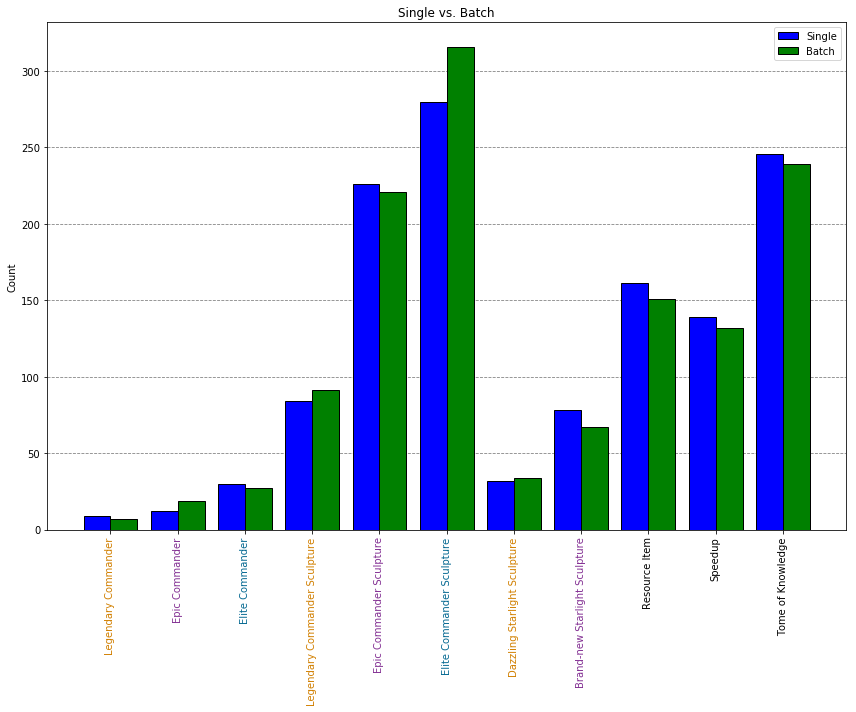

In [15]:
ind = np.arange(len(df_expect))
width = 0.4

f, ax = plt.subplots(1, 1, figsize=(12,10))
p1 = ax.bar(ind, df_single_group, width, color=colors['single'], edgecolor ='k')
p2 = ax.bar(ind+width, df_201_group, width, color=colors['201'], edgecolor ='k')

ax.set_title('Single vs. Batch')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_expect['Reward'], rotation=90)
ax.set_ylabel('Count')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend((p1[0], p2[0]), ('Single', 'Batch'))

set_label_color()

plt.tight_layout()
plt.savefig('plots/compare_single_batch.png')
plt.show()

Using a chi square independence test to assess the difference between batch and single item counts. The item frequencies do not depend on chest opening type. In other words, it makes no difference whether you open singles or open all chests in a batch

In [16]:
cont1 = df_single_group.reset_index()
cont1['sample'] = 'single'

cont2 = df_201_group.reset_index()
cont2['sample'] = 'batch'

cont = cont1.append(cont2).reset_index(drop=True)
cont = cont[cont['Count'] != 0]
cont = cont.pivot(index='Reward', columns='sample')
cont = cont.reindex(df_expect['Reward'])

scipy.stats.chi2_contingency(cont)

(5.9776137171874257,
 0.81714052149621041,
 10,
 array([[   8.02153018,    7.97846982],
        [  15.54171473,   15.45828527],
        [  28.57670127,   28.42329873],
        [  87.73548635,   87.26451365],
        [ 224.10149942,  222.89850058],
        [ 298.80199923,  297.19800077],
        [  33.088812  ,   32.911188  ],
        [  72.69511726,   72.30488274],
        [ 156.41983852,  155.58016148],
        [ 135.86466744,  135.13533256],
        [ 243.1526336 ,  241.8473664 ]]))